# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def get_current_weather(city,api_key):
                        
     url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial"
     payload = {
        "appid": api_key,
        "q":city
}
     r = requests.get(url, params=payload)
     if r.status_code == 200:
            return r.json()
     else:
            return None

In [4]:
all_cities = []
for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        all_cities.append(result)

In [5]:
len(cities)

609

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data = pd.DataFrame([{
    "City": d["name"],
    "Cloudiness": d["clouds"]["all"],
    "Country": d["sys"]["country"],
    "Date": d["dt"],
    "Humidity": d["main"]["humidity"],
    "Lat": d["coord"]["lat"],
    "Lng": d["coord"]["lon"],
    "Max Temp": d["main"]["temp_max"],
    "Wind Speed":d["wind"]["speed"],
} for d in all_cities])

In [7]:
weather_data.to_csv("cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

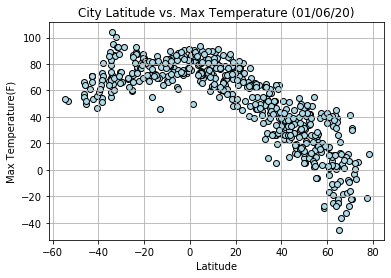

In [8]:
x_axis = (-90,90,20)
plt.title("City Latitude vs. Max Temperature (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(axis = "y")
plt.grid(axis = "x")
plt.scatter(weather_data["Lat"],weather_data["Max Temp"],color = "lightblue", edgecolor = "black")
plt.savefig("analysis/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

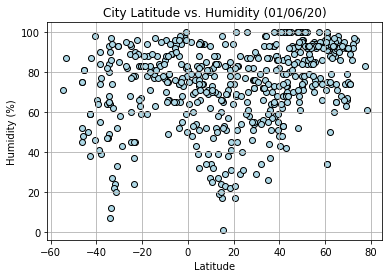

In [9]:
x_axis = (-90,90,20)
plt.title("City Latitude vs. Humidity (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis = "y")
plt.grid(axis = "x")
plt.scatter(weather_data["Lat"],weather_data["Humidity"],color = "lightblue", edgecolor = "black")
plt.savefig("analysis/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

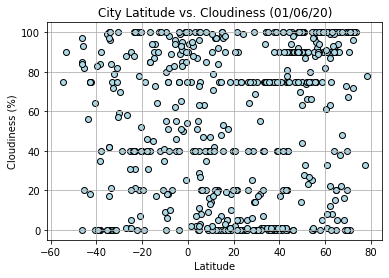

In [10]:
x_axis = (-90,90,20)
plt.title("City Latitude vs. Cloudiness (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis = "y")
plt.grid(axis = "x")
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"],color = "lightblue", edgecolor = "black")
plt.savefig("analysis/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

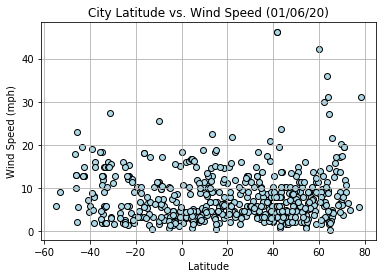

In [11]:
x_axis = (-90,90,20)
plt.title("City Latitude vs. Wind Speed (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis = "y")
plt.grid(axis = "x")
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],color = "lightblue", edgecolor = "black")
plt.savefig("analysis/fig4.png")
plt.show()